# TASK - 3
**Shreyan Das**

## Exploratory Data Analysis - Retail

**Objective(s)**:
- To perform ‘Exploratory Data Analysis’ on dataset ‘SampleSuperstore’
- As a business manager, try to find out the weak areas where more profit can be made
- Derive business problems through exploration of data

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
sns.set_style('whitegrid')

### The Dataset

In [3]:
data = pd.read_csv("SampleSuperstore.CSV")

In [4]:
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [5]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
Ship Mode       9994 non-null object
Segment         9994 non-null object
Country         9994 non-null object
City            9994 non-null object
State           9994 non-null object
Postal Code     9994 non-null int64
Region          9994 non-null object
Category        9994 non-null object
Sub-Category    9994 non-null object
Sales           9994 non-null float64
Quantity        9994 non-null int64
Discount        9994 non-null float64
Profit          9994 non-null float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [7]:
print('List of Categorical Data\n==== == =========== ====')
print('\nShip Mode:\n' + str(np.unique(data['Ship Mode'])))
print('\nSegment:\n' + str(np.unique(data['Segment'])))
print('\nCountry:\n' + str(np.unique(data['Country'])))
print('\nRegion:\n' + str(np.unique(data['Region'])))
print('\nState:\n' + str(np.unique(data['State'])))
print('\nCategory:\n' + str(np.unique(data['Category'])))
print('\nSub-Category:\n' + str(np.unique(data['Sub-Category'])))

List of Categorical Data
==== == =========== ====

Ship Mode:
['First Class' 'Same Day' 'Second Class' 'Standard Class']

Segment:
['Consumer' 'Corporate' 'Home Office']

Country:
['United States']

Region:
['Central' 'East' 'South' 'West']

State:
['Alabama' 'Arizona' 'Arkansas' 'California' 'Colorado' 'Connecticut'
 'Delaware' 'District of Columbia' 'Florida' 'Georgia' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming']

Category:
['Furniture' 'Office Supplies' 'Technology']

Sub-Category:
['Accessories' 'Appliances' 'Art' 'Binders' 'Bookcases' 'Chairs' 'Copiers'
 'Envelopes' 'Faste

### EDA

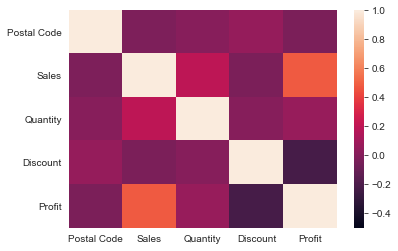

In [8]:
sns.heatmap(data.corr(),vmin=-0.5)

**Observations**
- Strong correlation between Profit and Sales
- No correlation between Discount and Profit

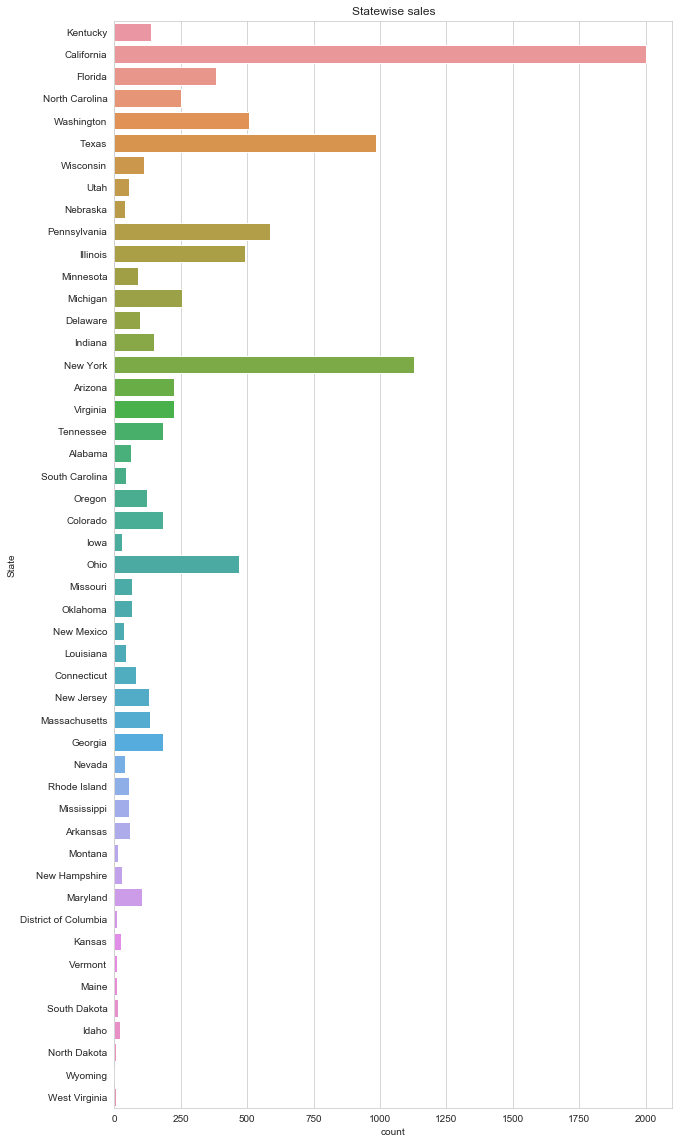

In [11]:
plt.figure(figsize=(10,20))
sns.countplot(y='State',data=data,orient="h")
plt.title('Statewise sales')
plt.show()

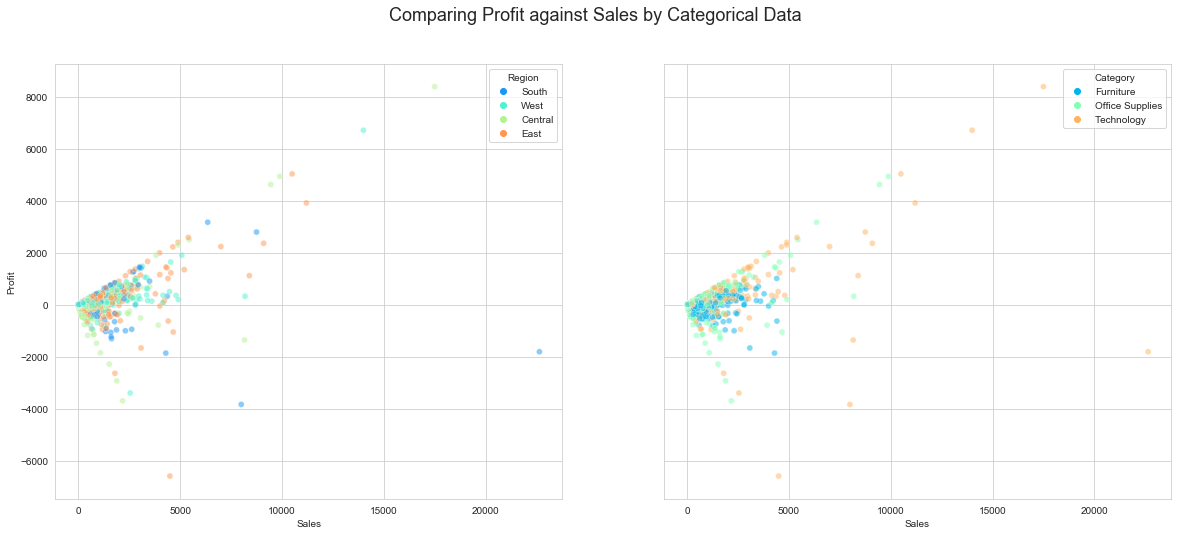

In [12]:
fig, ax = plt.subplots(1,2,figsize=(20,8),sharey=True)
sns.scatterplot(ax = ax[0],x='Sales',y='Profit',data=data,hue='Region',palette='rainbow',alpha=0.5)
sns.scatterplot(ax = ax[1],x='Sales',y='Profit',data=data,hue='Category',palette='rainbow',alpha=0.5)
fig.suptitle('Comparing Profit against Sales by Categorical Data',fontsize=18)
plt.show()

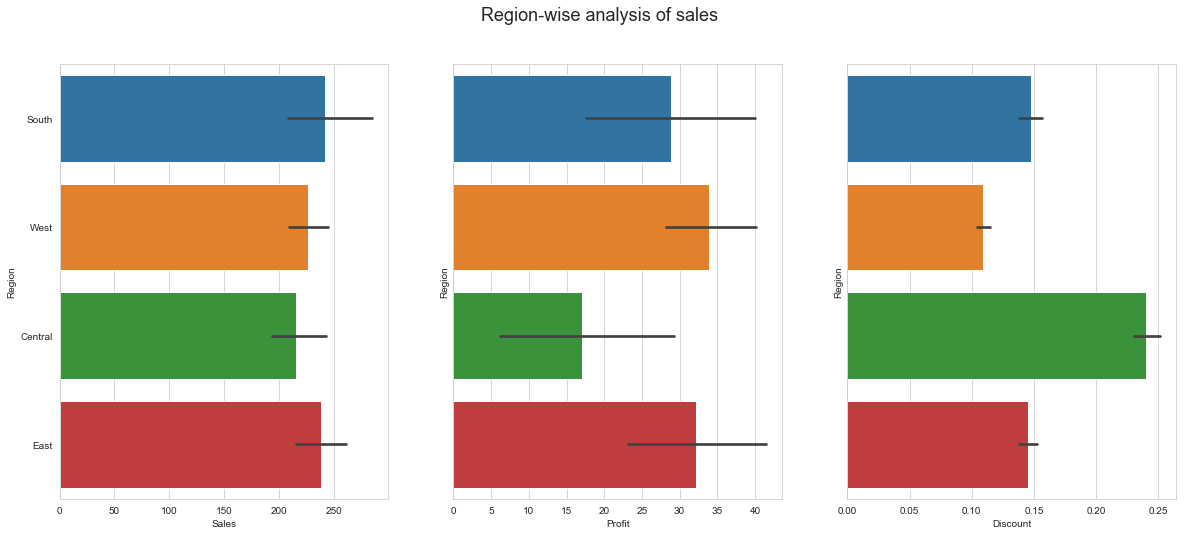

In [13]:
fig, ax = plt.subplots(1,3,figsize=(20,8),sharey=True)
sns.barplot(ax=ax[0],y='Region',x='Sales',data=data,orient='h')
sns.barplot(ax=ax[1],y='Region',x='Profit',data=data,orient='h')
sns.barplot(ax=ax[2],y='Region',x='Discount',data=data,orient='h')
fig.suptitle('Region-wise analysis of sales',fontsize=18)
plt.show()

**Observations**
- South region generating maximum sales and comparatively low profits.
- Disproportionately high discount in central region resulting in low profits.

Text(0.0, -25, 'Zero Profit Line')

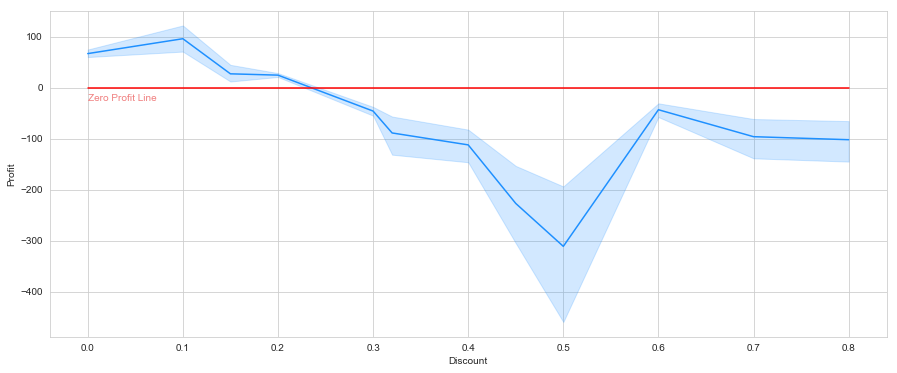

In [14]:
plt.figure(figsize=(15,6))
sns.lineplot(x='Discount',y='Profit',data=data,color='dodgerblue')
sns.lineplot(x=[0,0.8],y=[0,0],color='red')
plt.text(0.0,-25,'Zero Profit Line',fontdict={'color':'lightcoral'})

**Observations**
- For making profits, it's best to keep discount at a maximum of 20%

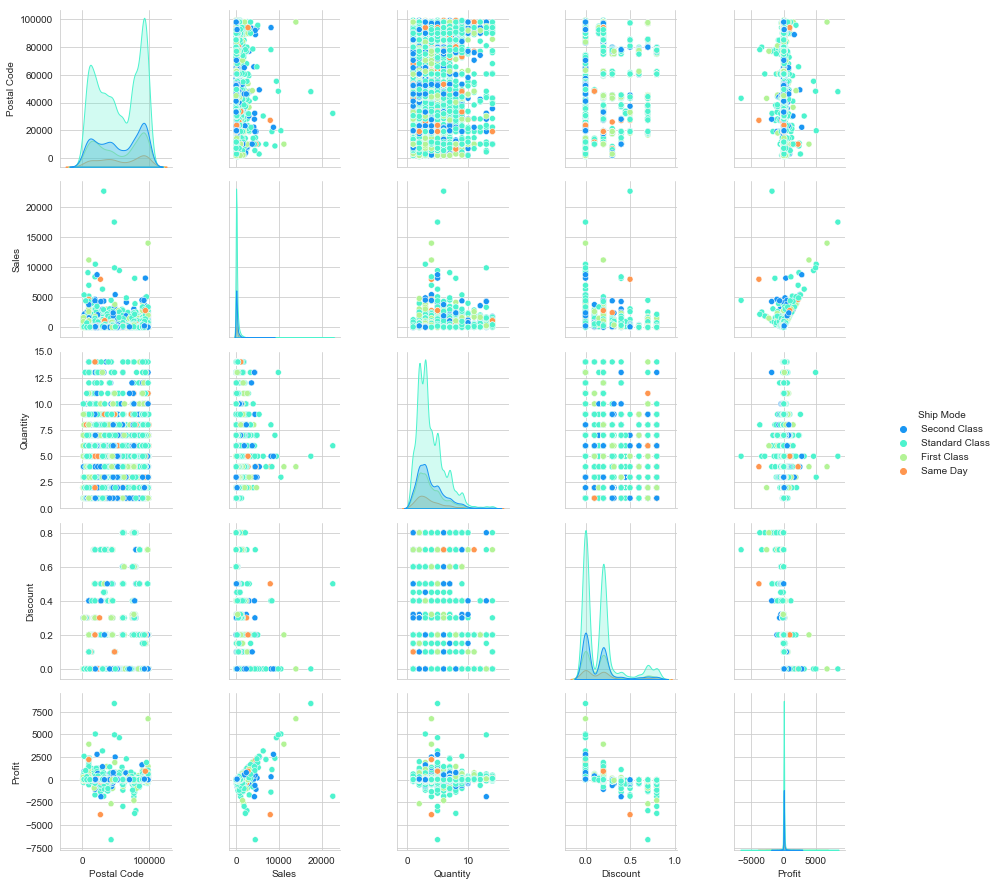

In [15]:
sns.pairplot(data,hue='Ship Mode',palette='rainbow')

**Observations**
- Same Day Shipments not generating losses (generating good profits)
- Negative profit for Discount > 0.5 && Ship Mode ≠ Same Day

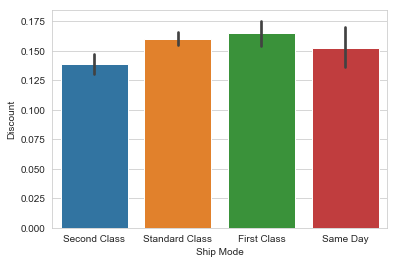

In [16]:
sns.barplot(x='Ship Mode',y='Discount',data=data)

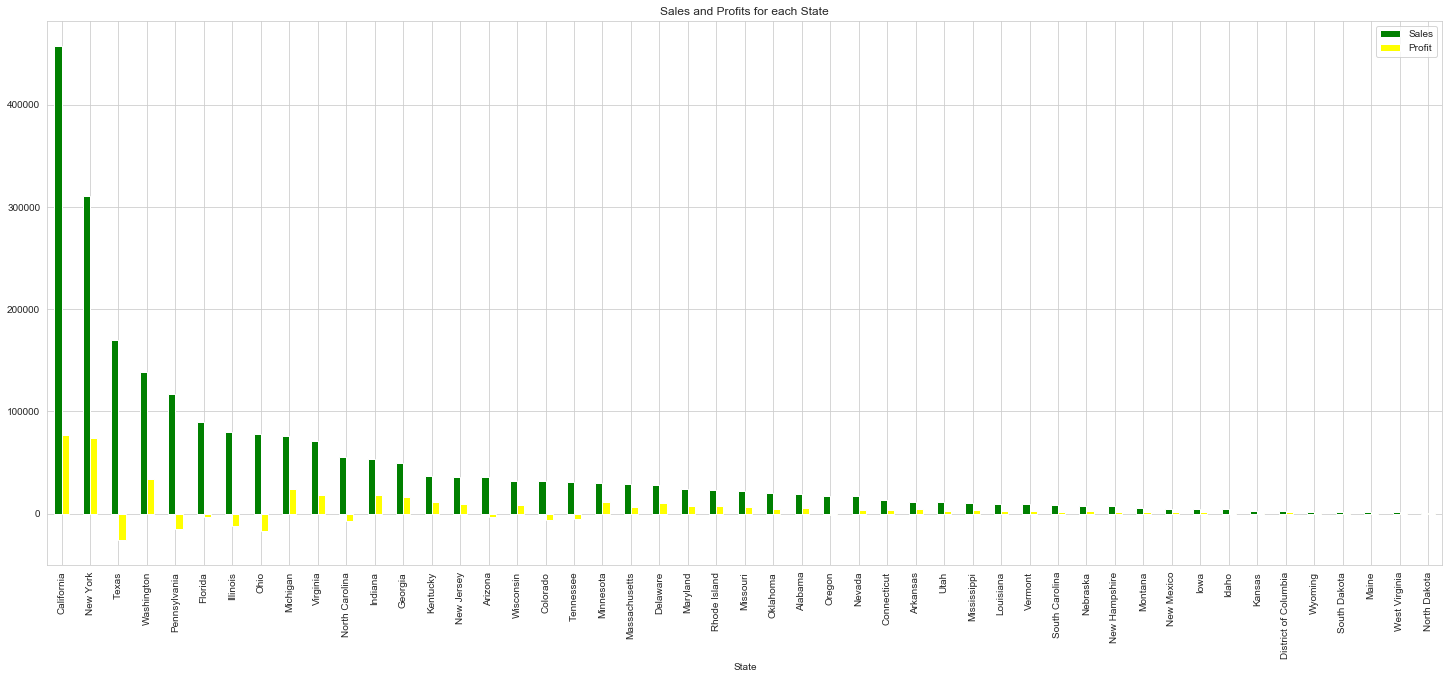

In [18]:
plt.rcParams["figure.figsize"] = [25,10]
data.groupby("State")[["Sales", "Profit"]].sum().sort_values(by = "Sales", ascending = False).plot(kind = "bar", color = ["green", "yellow"])
plt.title("Sales and Profits for each State")
plt.show()

**Observations**
- Texas , Pennsylvania and Florida have among the highest sales, but negative profits.

In [19]:
statewise = data.groupby('State')['Sales','Quantity','Discount','Profit']

In [20]:
statewise.sum().describe()

,Sales,Quantity,Discount,Profit
count,49.000000,49.000000,49.000000,49.000000
mean,46881.650210,772.918367,31.858980,5844.837178
std,80776.294534,1332.440396,70.246791,17468.637186
min,919.910000,4.000000,0.000000,-25729.356300
25%,7464.930000,136.000000,0.000000,230.149700
50%,22205.150000,281.000000,0.600000,2196.102300
75%,49095.840000,705.000000,32.400000,7285.629300
max,457687.631500,7667.000000,364.640000,76381.387100


In [21]:
low_profit = statewise.sum()[statewise.sum()['Profit'] < 0].reset_index()
low_profit.rename(columns = {'Profit':'Loss'}, inplace = True)
def negate(x):
    return -x
low_profit['Loss'] = low_profit['Loss'].apply(negate)
low_profit

,State,Sales,Quantity,Discount,Loss
0,Arizona,35282.0010,862,68.00,3427.9246
1,Colorado,32108.1180,693,57.60,6527.8579
2,Florida,89473.7080,1379,114.65,3399.3017
3,Illinois,80166.1010,1845,191.90,12607.8870
4,North Carolina,55603.1640,983,70.60,7490.9122
5,Ohio,78258.1360,1759,152.40,16971.3766
6,Oregon,17431.1500,499,35.80,1190.4705
7,Pennsylvania,116511.9140,2153,192.90,15559.9603
8,Tennessee,30661.8730,681,53.30,5341.6936
9,Texas,170188.0458,3724,364.64,25729.3563


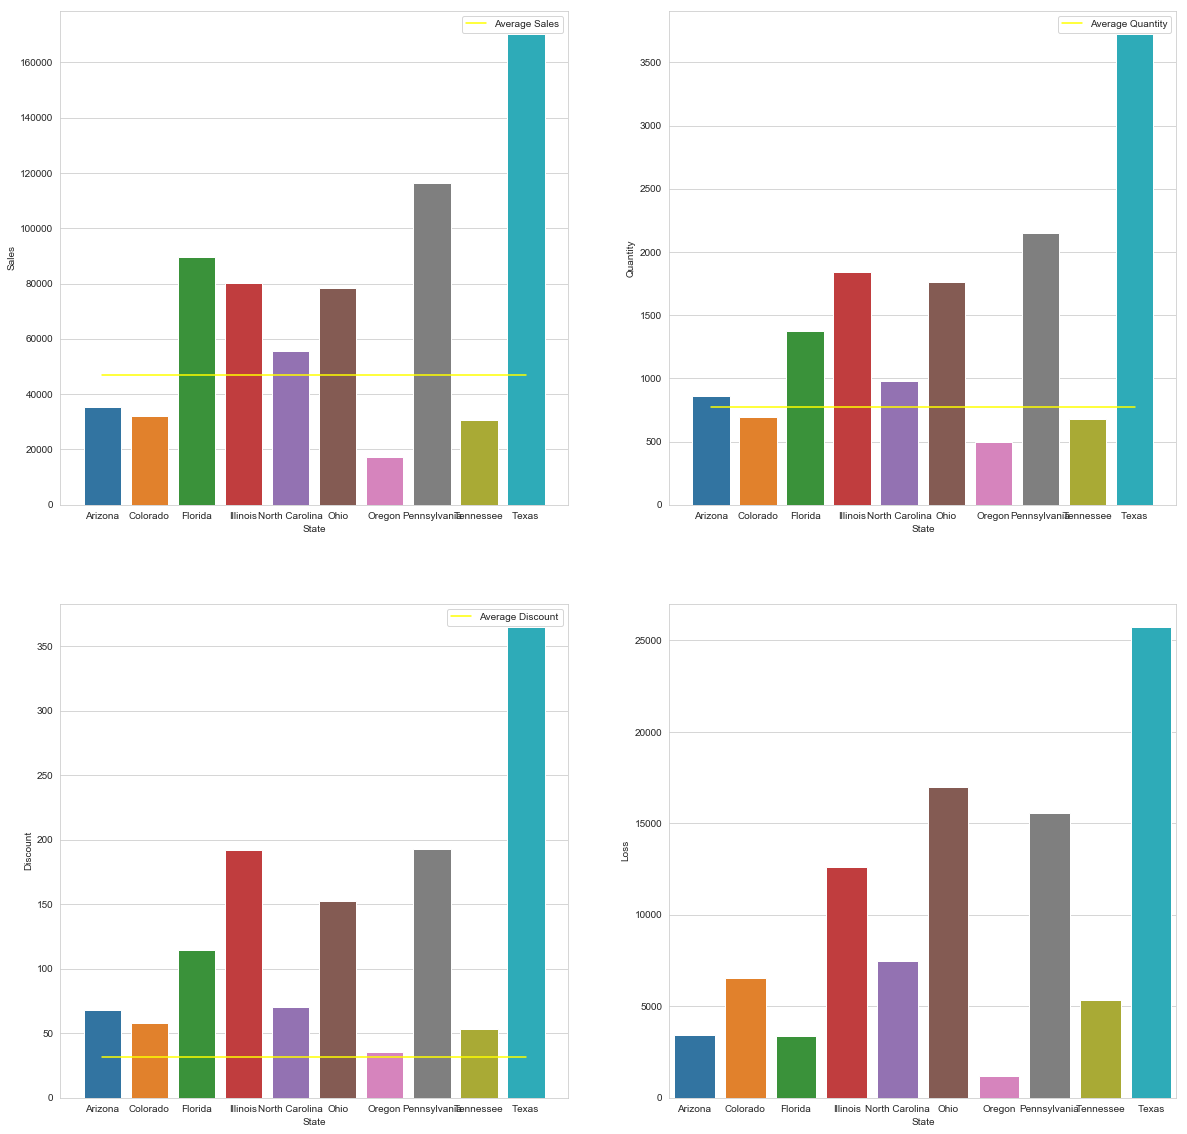

In [22]:
fig,ax = plt.subplots(2,2,figsize=(20,20))

sns.barplot(x='State',y='Sales',data=low_profit,ax=ax.flatten()[0])
sns.lineplot(
    x=list(low_profit.index), 
    y=[statewise.sum().describe().iloc[1]['Sales']]*len(low_profit.index),
    color='yellow',
    label='Average Sales',ax=ax.flatten()[0])

sns.barplot(x='State',y='Quantity',data=low_profit,ax=ax.flatten()[1])
sns.lineplot(
    x=list(low_profit.index), 
    y=[statewise.sum().describe().iloc[1]['Quantity']]*len(low_profit.index),
    color='yellow',
    label='Average Quantity',ax=ax.flatten()[1])

sns.barplot(x='State',y='Discount',data=low_profit,ax=ax.flatten()[2])
sns.lineplot(
    x=list(low_profit.index), 
    y=[statewise.sum().describe().iloc[1]['Discount']]*len(low_profit.index),
    color='yellow',
    label='Average Discount',ax=ax.flatten()[2])

sns.barplot(x='State',y='Loss',data=low_profit,ax=ax.flatten()[3])

**Observations**
- Texas gives maximum discount, and has the highest loss. Solution - reduce the discounts given out in this state.
- All the states that have seen losses are giving out more than the average discount which needs to be cut down on.
- The states Arizona, Colorado, Oregon and Tennessee have decidedly low sales, which needs a boost